# Camera

## Location

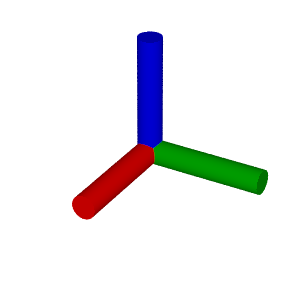

In [1]:
from fdray import *

Scene(
    Camera(30, 30, view_scale=1.2),
    LightSource(0, "white"),  # at camera location
    Cylinder((0, 0, 0), (1, 0, 0), 0.1, Color("red")),
    Cylinder((0, 0, 0), (0, 1, 0), 0.1, Color("green")),
    Cylinder((0, 0, 0), (0, 0, 1), 0.1, Color("blue")),
).render(width=300, height=300)

The camera implementation is based on the following Qiita article

 - Title: Efficient Camera Settings in POV-Ray
 - Author: @Hyrodium (Yuto Horikawa)
 - URL: https://qiita.com/Hyrodium/items/af91b1ddb8ea2c4359c2
 - Date: 2017-12-07

We adopt the spherical coordinate system for camera positioning
and the calculation methods for direction, right, and up vectors.

## Orbital Location

Calculate a position in orbit around the camera's location

Imagine tilting your head up (`angle`) and then rotating
counter-clockwise (`rotation`):

- First, move `forward` along viewing direction (0=at `camera.location`,
    1=at `camera.look_at`). Negative values move behind the camera.
- Then, tilt up from viewing direction by `angle` degrees
- Finally, rotate counter-clockwise from up by `rotation` degrees
    (0=up, 90=left, 180=down, 270=right)

In [2]:
def scene(camera: Camera, *args):
    return Scene(
        camera,
        LightSource(0, "white"),
        Cylinder((0, 0, 0), (2, 0, 0), 0.02, Color("red")),
        Cylinder((0, 0, 0), (0, 2, 0), 0.02, Color("green")),
        Cylinder((0, 0, 0), (0, 0, 2), 0.02, Color("blue")),
        *args,
    ).render(width=400, height=400)

<0, 0, 2>
<0, 2, 0>


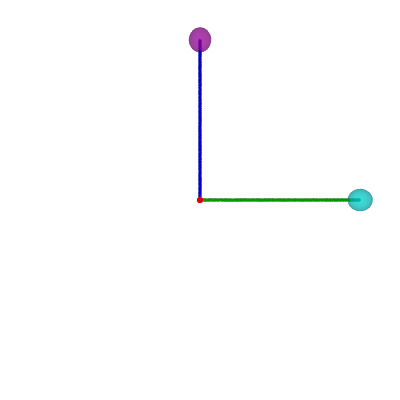

In [5]:
from math import asin, degrees, sqrt

distance = 4
camera = Camera(0, 0, view_scale=2.5, look_at=(0, 0, 0), distance=distance)
n = sqrt(distance**2 + 2**2)
p = camera.orbital_location(n / distance, degrees(asin(2 / n)))
print(p)
s1 = Sphere(p, 0.14, Color("purple", 0.5))
p = camera.orbital_location(n / distance, degrees(asin(2 / n)), -90)
print(p)
s2 = Sphere(p, 0.14, Color("cyan", 0.5))
scene(camera, s1, s2)